# Basic visualizations

Note that this functionality only works on `xarray.DataArray`.

In [11]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
os.chdir('/glade/u/home/fengzhu/Github/x4c/docsrc/notebooks')
import x4c
print(x4c.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024.5.2.17


## Load data

In [2]:
dirpath = '/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005/atm/proc/tseries/month_1'
fname = 'b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005.cam.h0.TS.695101-700012.nc'
ds = x4c.load_dataset(os.path.join(dirpath, fname), comp='atm', grid='ne16', adjust_month=True)
ds

<xarray.Dataset> Size: 34MB
Dimensions:       (lev: 30, ilev: 31, ncol: 13826, time: 600, nbnd: 2)
Coordinates:
  * lev           (lev) float64 240B 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 248B 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time          (time) object 5kB 6951-01-31 00:00:00 ... 7000-12-31 00:00:00
Dimensions without coordinates: ncol, nbnd
Data variables: (12/32)
    hyam          (lev) float64 240B 0.003643 0.007595 0.01436 ... 0.001989 0.0
    hybm          (lev) float64 240B 0.0 0.0 0.0 0.0 ... 0.9512 0.9743 0.9926
    P0            float64 8B 1e+05
    hyai          (ilev) float64 248B 0.002255 0.005032 0.01016 ... 0.0 0.0
    hybi          (ilev) float64 248B 0.0 0.0 0.0 0.0 ... 0.9636 0.9851 1.0
    lat           (ncol) float64 111kB -35.26 -35.98 -37.07 ... 37.91 36.74
    ...            ...
    f11vmr        (time) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    f12vmr        (time) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    sol_tsi       (time) float64 5kB -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    nsteph        (time) int32 2kB 121765488 121766832 ... 122638512 122640000
    TS            (time, ncol) float32 33MB 303.3 302.6 301.7 ... 293.7 294.3
    gw            (ncol) float64 111kB 0.0001546 0.000515 ... 0.00129 0.001289
Attributes: (12/14)
    np:               4
    ne:               16
    Conventions:      CF-1.0
    source:           /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/times...
    case:             b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO...
    title:            UNSET
    ...               ...
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /glade/work/fengzhu/Projects/Miocene-on-Derecho/04.atm-...
    topography_file:  /glade/work/fengzhu/Projects/Miocene-on-Derecho/04.atm-...
    comp:             atm
    grid:             ne16

The original `xarray.plot()` is very barebone.

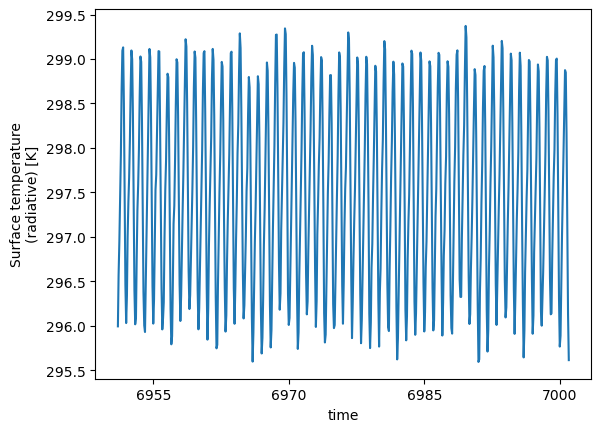

In [3]:
da = ds['TS'].mean('ncol')  # a simple average for illustration purposes
da.plot()

## Setting styles

We may set one of a supported styles:
- "journal": suitable for journal papers
- "web": suitable for posters

with suffix such as:
- "_spines": to add full spines
- "_nospines": to remove the spines
- "_grid": to add grid lines
- "_nogrid": to remove grid lines

with a `font_scale` to adjust the general fontsize of the plots.

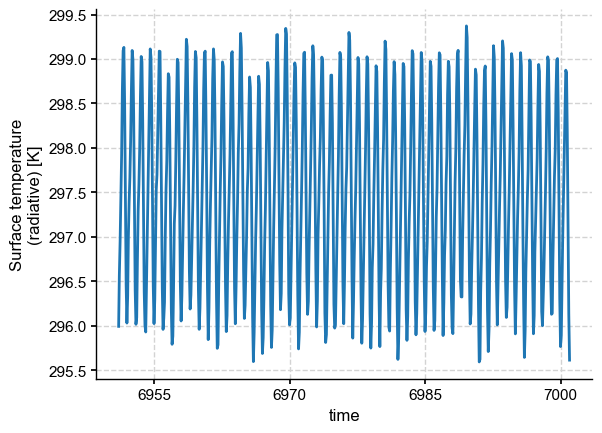

In [4]:
x4c.set_style(style='journal', font_scale=1.0)
da.plot()

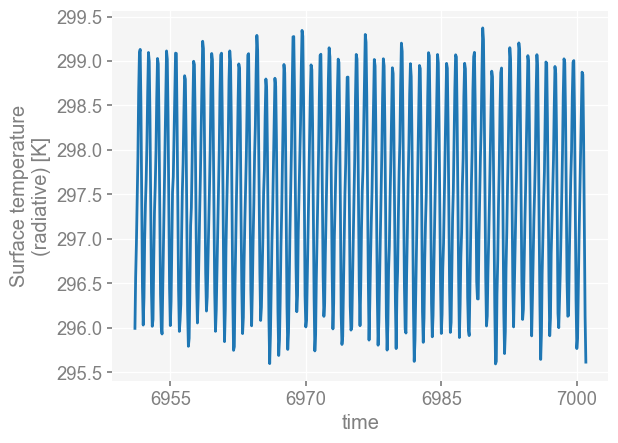

In [5]:
x4c.set_style(style='web', font_scale=1.2)
da.plot()

## Need for Metadata

The barebone `xarray` plots shows no units information for the x/y-labels.
With `x4c`, this can be automatically done!

Note below the extra `xarray.Dataarray` metadata inherited from `xarray.Dataset`.

In [6]:
da = ds.x['TS'].x.gm.x.annualize()
da

<xarray.DataArray 'TS' (time: 50)> Size: 400B
array([297.44604614, 297.5491724 , 297.45383146, 297.44403241,
       297.55580694, 297.26572877, 297.38021075, 297.62624207,
       297.47985505, 297.46543716, 297.51161599, 297.3395725 ,
       297.46473645, 297.68546113, 297.23539777, 297.20041339,
       297.25133594, 297.56941974, 297.70068463, 297.38331482,
       297.4503437 , 297.60338024, 297.50886764, 297.28488397,
       297.41718804, 297.69480167, 297.43344534, 297.35716239,
       297.31500203, 297.5542585 , 297.35296266, 297.28351761,
       297.4581372 , 297.46001274, 297.41089443, 297.47891052,
       297.43295088, 297.48825708, 297.69108137, 297.29564082,
       297.20997629, 297.45330903, 297.61747156, 297.45481035,
       297.39757657, 297.36962735, 297.38822117, 297.47826652,
       297.45152951, 297.25812661])
Coordinates:
  * time     (time) object 400B 6951-12-31 00:00:00 ... 7000-12-31 00:00:00
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean
    source:        /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'gw' (ncol: 13826)> Size: 111kB\narray([...
    lat:           <xarray.DataArray 'lat' (ncol: 13826)> Size: 111kB\narray(...
    lon:           <xarray.DataArray 'lon' (ncol: 13826)> Size: 111kB\narray(...
    comp:          atm
    grid:          ne16

Note below that the returns of `x.plot()` method becomes `fig, ax`, which means that we can modify `ax` and save the `fig`.

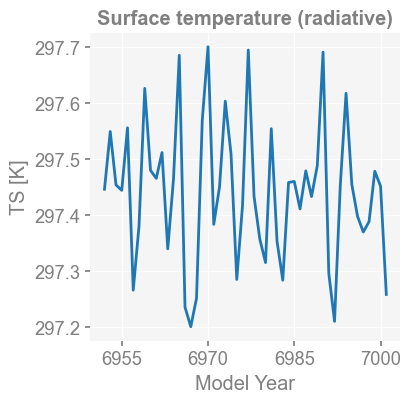

Figure saved at: "figs/GMST.pdf"


In [7]:
fig, ax = da.x.plot(figsize=(4, 4))
x4c.showfig(fig)
x4c.savefig(fig, './figs/GMST.pdf')

## Plotting maps

The original plot from `xarray` is also barebone.

Regridding from [1, 13826] to [180, 360]


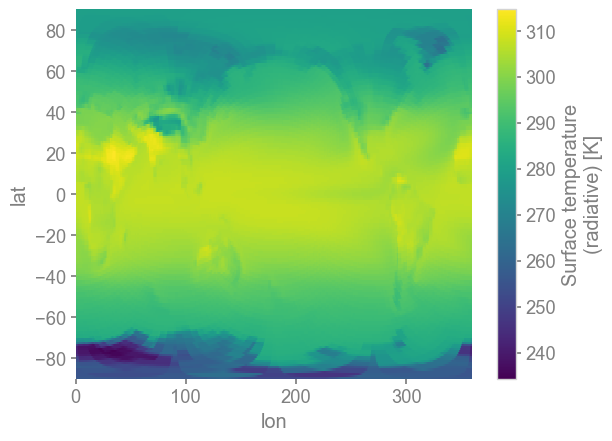

In [8]:
da = ds.x.regrid().x['TS'].x.annualize()
da_clim = da.mean('time')
da_clim.plot()

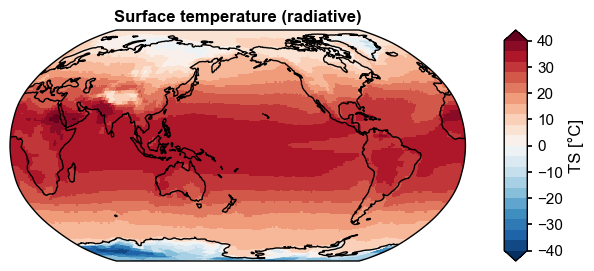

In [9]:
import numpy as np
x4c.set_style('journal', font_scale=1)

da_clim = da.mean('time') - 273.15
da_clim
da_clim.attrs['units'] = '°C'
fig, ax = da_clim.x.plot(
    levels=np.linspace(-40, 40, 21),
    cbar_kwargs={'ticks': np.linspace(-40, 40, 9)},
)

## Add coastlines based on ocean data

In [10]:
dirpath = '/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005/ocn/proc/tseries/month_1'
fname = 'b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005.pop.h.SSH.695101-700012.nc'
ds = x4c.load_dataset(os.path.join(dirpath, fname), comp='ocn', grid='g16', adjust_month=True)
ds['SSH']

<xarray.DataArray 'SSH' (time: 600, nlat: 384, nlon: 320)> Size: 295MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    ULONG    (nlat, nlon) float64 983kB 343.5 344.8 346.1 ... 326.4 326.7 327.0
    ULAT     (nlat, nlon) float64 983kB -87.53 -87.52 -87.5 ... 72.64 72.64
    TLONG    (nlat, nlon) float64 983kB 341.6 342.9 344.2 ... 326.2 326.5 326.8
    TLAT     (nlat, nlon) float64 983kB -87.73 -87.72 -87.7 ... 72.52 72.52
  * time     (time) object 5kB 6951-01-31 00:00:00 ... 7000-12-31 00:00:00
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Sea Surface Height
    units:         centimeter
    grid_loc:      2110
    cell_methods:  time: mean

In [11]:
ssh = ds.x.regrid()['SSH']
ssh

<xarray.DataArray 'SSH' (time: 600, lat: 180, lon: 360)> Size: 156MB
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [39.49779 , 39.665573, 39.881107, ..., 39.28599 , 39.305473,
         39.37779 ],
        [41.147457, 41.190815, 41.21863 , ..., 40.92594 , 41.014805,
         41.088722],
        [43.030464, 43.084076, 43.136173, ..., 42.965576, 42.957214,
         42.988926]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [46.571747, 46.713547, 46.90344 , ..., 46.439327, 46.43239 ,
         46.47806 ],
        [47.864403, 47.903175, 47.925606, ..., 47.65192 , 47.738552,
         47.80946 ],
        [49.071136, 49.115696, 49.158726, ..., 49.027393, 49.008648,
         49.035866]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [47.19896 , 47.34423 , 47.530663, ..., 47.012676, 47.031864,
         47.09486 ],
        [48.29843 , 48.35073 , 48.3888  , ..., 48.057823, 48.151775,
         48.232048],
        [49.735096, 49.77818 , 49.81991 , ..., 49.6777  , 49.67085 ,
         49.699608]]], dtype=float32)
Coordinates:
  * lat                 (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * time                (time) object 5kB 6951-01-31 00:00:00 ... 7000-12-31 ...
    latitude_longitude  float64 8B nan
Attributes:
    long_name:     Sea Surface Height
    units:         centimeter
    grid_loc:      2110
    cell_methods:  time: mean

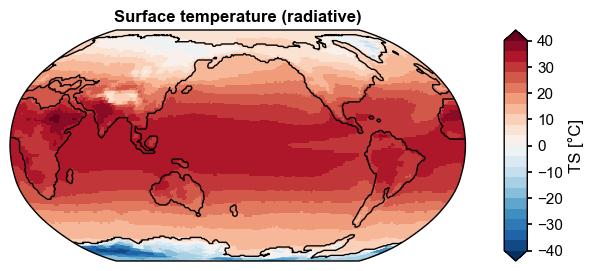

In [12]:
fig, ax = da_clim.x.plot(
    levels=np.linspace(-40, 40, 21),
    cbar_kwargs={'ticks': np.linspace(-40, 40, 9)},
    ssv=ssh.mean('time'),
)

## OCN

In [2]:
dirpath = '/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005/ocn/proc/tseries/month_1'
fname = 'b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005.pop.h.TEMP.695101-700012.nc'
ds = x4c.open_dataset(os.path.join(dirpath, fname), comp='ocn', grid='g16', adjust_month=True)

In [6]:
da_ann = ds.x['TEMP'].isel(z_t=0).x.annualize()

In [7]:
sst = da_ann.x.regrid()

In [8]:
sst_clim = sst.mean('time')
sst_clim.attrs['units'] = '°C'
sst_clim.attrs['long_name'] = 'Sea Surface Temperature'
sst_clim.name = 'SST'
sst_clim

<xarray.DataArray 'SST' (lat: 180, lon: 360)> Size: 259kB
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [6.079927 , 6.0755725, 6.071318 , ..., 6.093467 , 6.0889406,
        6.0843835],
       [6.1800756, 6.178551 , 6.17708  , ..., 6.184958 , 6.1832805,
        6.181652 ],
       [6.2866673, 6.286374 , 6.2860956, ..., 6.2877827, 6.287389 ,
        6.287011 ]], dtype=float32)
Coordinates:
  * lat                 (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
    z_t                 float32 4B 500.0
    latitude_longitude  float64 8B nan
Attributes:
    long_name:     Sea Surface Temperature
    units:         °C
    grid_loc:      3111
    cell_methods:  time: mean
    path:          /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'gw' (lat: 180, lon: 360)> Size: 518kB\n...
    lat:           <xarray.DataArray 'lat' (lat: 180)> Size: 1kB\narray([-89....
    lon:           <xarray.DataArray 'lon' (lon: 360)> Size: 3kB\narray([  0....
    comp:          ocn
    grid:          g16

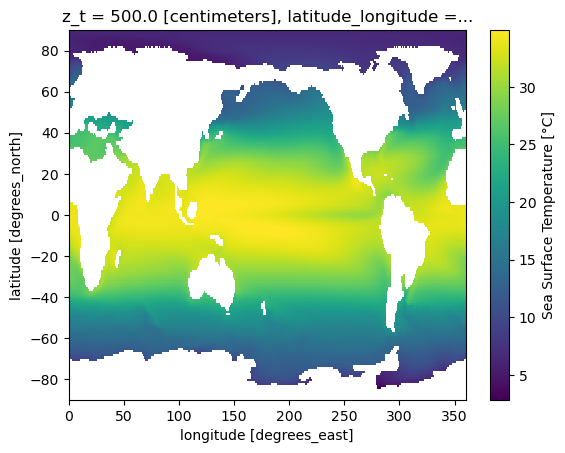

In [9]:
sst_clim.plot()

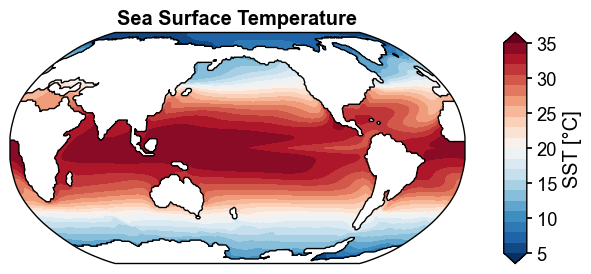

In [15]:
x4c.set_style('journal_spines', font_scale=1.2)
fig, ax = sst_clim.x.plot(
    levels=np.linspace(5, 35, 21),
    cbar_kwargs={'ticks': np.linspace(5, 35, 7)},
)

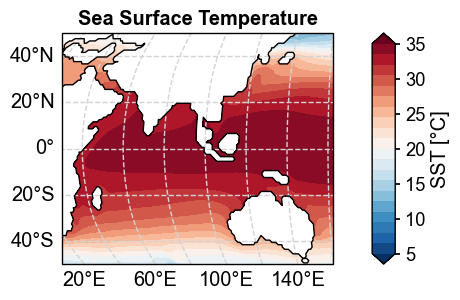

In [25]:
x4c.set_style('journal_spines', font_scale=1.2)
fig, ax = sst_clim.x.plot(
    levels=np.linspace(5, 35, 21),
    cbar_kwargs={'ticks': np.linspace(5, 35, 7)},
    add_gridlines=True,
    latlon_range=[-50, 50, 30, 160],
)